# Softmax Regression

Softmax에 대한 자세한 설명은 제 Notion 페이지에 있습니다.

https://noversezero.notion.site/Softmax-Regression-443d6bf93b234f11a3e6134130953d7b

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# mnist 데이터 로딩 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

 mnist 데이터는 6만개의 train 데이터와 1만개의 test 데이터로 이루어져있습니다.
 
 한개의 데이터는 28, 28의 2차원 배열 형태로 저장이 되어 있습니다.
 
 즉, 가로 28, 세로 28의 흑백 이미지들의 집합입니다.

In [3]:
# Covert uint8 to float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

In [4]:
# Flatten images to 1-0 vector of 784 features (28*28), 1차원 벡터로 변환
x_train, x_test = x_train.reshape([-1, 28*28]), x_test.reshape([-1, 28*28])

reshape(-1, x)는 모든 원소를 다 사용한다는 것이다.

즉, x_train.reshape([-1, 28x28])은 x_train의 모든 원소들을 28x28(왜냐 한 데이터가 28x28 차원이기 때문에)의 1차원 벡터로 바꾼다는 의미이다.

In [5]:
# Normalize images value from [0, 255] to [0,1] 
#0부터 255까지 숫자로 되어 있는 것을 255로 나누어서 Nomalization
x_train, x_test = x_train / 255, x_test / 255

이 데이터를 이해하기 휩게 0과 1사이의 실수값으로 데이터를 변환하는게 필요합니다.

255로 나누어 0과 1사이의 값으로 만들어 줍니다.

In [14]:
# One-Hot-Encoding
one_hot_y_train = np.eye(10)[y_train]
one_hot_y_test = np.eye(10)[y_test]

y_train과 y_test를 One Hot Encoding으로 만드는 것이다.

np.eye(n)은 nxn의 단위행렬을 만드는 것이다.

원래 np.eye(n)은 대각행렬에 1이 위치하지만, 뒤에 [y_test or train]을 통해 1이 위치하는 위치를 조정할 수 있다.

즉, 한 행에 1이 1개이고 나머지가 0인 One-Hot-Encoding이 된 것이다.

In [15]:
# batch_size을 정의하고, 학습
batch_size = 512

train_data = tf.data.Dataset.from_tensor_slices((x_train, one_hot_y_train))
#5000번 섞고, batch size만큼 뽑아서 학습
train_data = train_data.shuffle(5000).batch(batch_size).prefetch(1)
test_data = tf.data.Dataset.from_tensor_slices((x_test, one_hot_y_test))

tf.data.Dataset.from_tensor_slices()은 Dataset을 생성하는 함수이다.

우리는 로컬 파일이나 메모리에 올려져 있는 데이터를 모델로 집어 넣어 평가하고 연산하고 다양한 작업을 진행하게 된다.

이때 우리의 데이터가 일정 순서에 따라서 작업이 진행될 수 있도록 도와주는 것이다.

따라서 이를 파이프 라인 빌드라고 한다.

prefetch(1)은 Dataset이 항상 한 Batch가 미리 준비되어 있도록 준비해준다.

즉, 어떤 Batch가 모델에 들어가서 연산을 진행하고 있을때, 연산이 끝나면 바로 다른 하나의 Batch를 넣을 수 있도록 준비를 해놓는 것이다.

In [19]:
# model 정의
model = tf.keras.models.Sequential()
# Softmax를 이용하고 출력이 10개 0~9 중 한개의 값으로 예측
model.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax))

In [21]:
# SGD 방법으로 Optimizer를 사용하고, Cross-Entropy를 사용하여 Loss Function을 계산한다.
model.compile(optimizer='sgd', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

predicted :  2


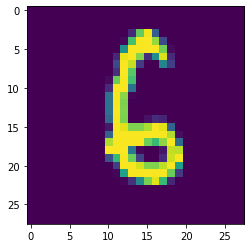

In [22]:
i = 4579
# 4579번째 그림을 출력
plt.imshow(x_test[i].reshape(28, 28))
print("predicted : ", np.argmax(model.predict(np.array([x_test[i]])), axis=1)[0])

In [30]:
model.predict(np.array([x_test[i]]))

array([[0.13501413, 0.05460301, 0.13652675, 0.08576441, 0.13066295,
        0.09512195, 0.13367128, 0.09746242, 0.06176591, 0.06940713]],
      dtype=float32)

지정한 영역에서 argmax는 최대값을 찾아주는 함수이다.

np.array([x_test[4579]])에서 가장 큰 수를 찾아서 해당 위치의 값을 print하는 것이다.